# Problem 1: Linear Regression



# You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


In [465]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt   
import matplotlib.style
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.style.use('classic')
import seaborn as sns
%matplotlib inline 

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [466]:
df = pd.read_csv('cubic_zirconia.csv')

In [467]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# Observation

Top 5 record of the dataset.

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


# Observation

In the dataset there are Total 11 columns and 26967 rows. In the dataset there are 6 float variables columns,2 integer variable columns and 3 object variable columns.

In [469]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

# Observation

In the dataset there are only one variable has the null values. Apart from that there are no any null values in the dataset.

In [470]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


# Observation

In the dataset there are 26967 rows and 8 numeric columns out of 11 total columns. In the dataset most of the variables have approxly mean and median are same and also there are some variables have outliers.

In [471]:
df.shape

(26967, 11)

# Observation

In the dataset there are Total 11 columns and 26967 rows.

In [472]:
df.duplicated().sum()

0

# Observation

The datset has zero duplicate values.

In [473]:
df = df.drop("Unnamed: 0" , axis =1)

In [474]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [475]:
df = pd.get_dummies(df, columns=['cut','color','clarity'])

# Observation

Convert the Categorical variabe into the dummy variables.

In [476]:
df.head()

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,499,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          26967 non-null  float64
 1   depth          26270 non-null  float64
 2   table          26967 non-null  float64
 3   x              26967 non-null  float64
 4   y              26967 non-null  float64
 5   z              26967 non-null  float64
 6   price          26967 non-null  int64  
 7   cut_Fair       26967 non-null  uint8  
 8   cut_Good       26967 non-null  uint8  
 9   cut_Ideal      26967 non-null  uint8  
 10  cut_Premium    26967 non-null  uint8  
 11  cut_Very Good  26967 non-null  uint8  
 12  color_D        26967 non-null  uint8  
 13  color_E        26967 non-null  uint8  
 14  color_F        26967 non-null  uint8  
 15  color_G        26967 non-null  uint8  
 16  color_H        26967 non-null  uint8  
 17  color_I        26967 non-null  uint8  
 18  color_

In [478]:
df.duplicated().sum()

34

In [479]:
df.drop_duplicates(inplace = True)

# EDA

# Univariate Analysis.

In [480]:
df.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

# Distplot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

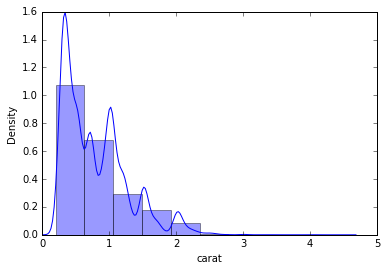

In [481]:
sns.distplot(df.carat,bins=10)

# Insight

The data is not normally distributed.It is right skewed data.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

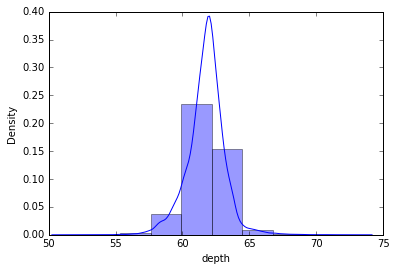

In [482]:
sns.distplot(df.depth,bins=10)

# Insight

The data is normally Distributed.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

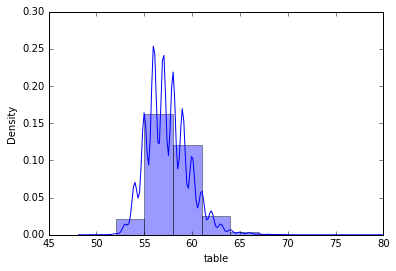

In [483]:
sns.distplot(df.table,bins=10)

# Insight

The data is almost normally distributed but it is not perfactlly normal distribution.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

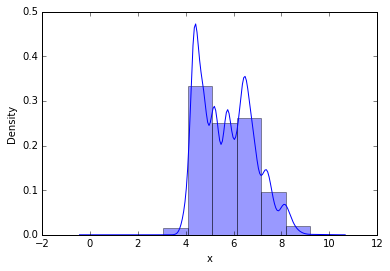

In [484]:
sns.distplot(df.x,bins=10)

# Insight

The data is not normally ditributed.It is left skewed data.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

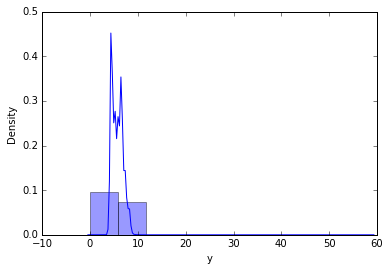

In [485]:
sns.distplot(df.y,bins=10)

# Insight

The data is not normally distributed.It is right skewed data.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z', ylabel='Density'>

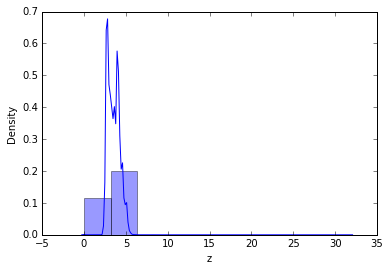

In [486]:
sns.distplot(df.z,bins=10)

# Insight

The data is not normally distributed.It is right skewed data.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

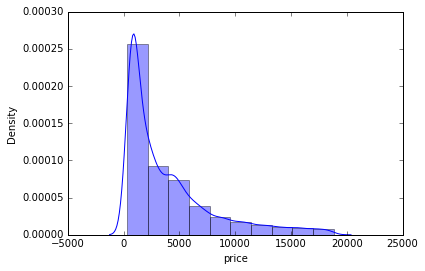

In [487]:
sns.distplot(df.price,bins=10)

# Insight

The data is not normally disributed. The price of the cubic zirconia is between 100 to 20000 Rs.

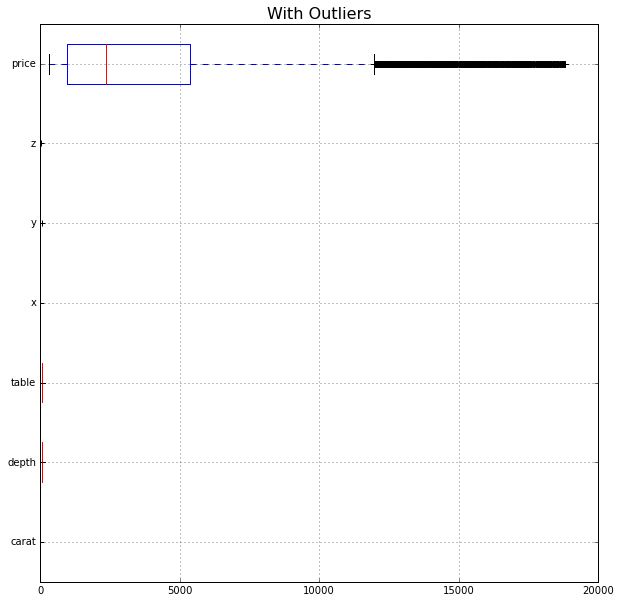

In [488]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [489]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [490]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

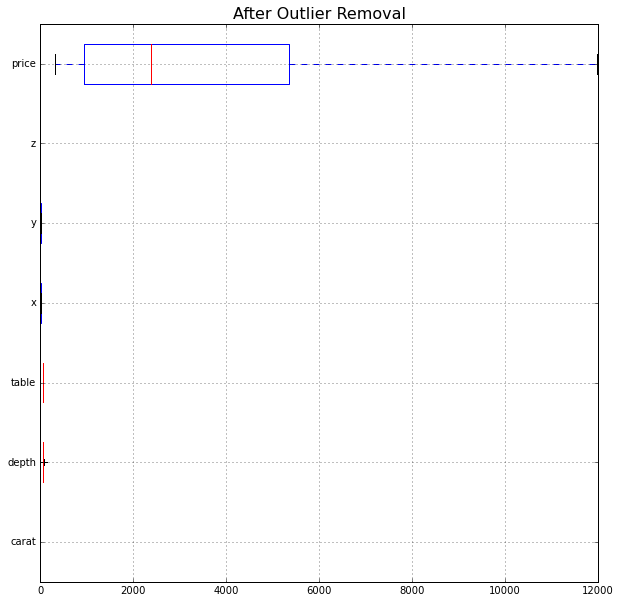

In [491]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

# Insight

Remove the outliers from the variables.

# Bivariate Analysis

# Heatmap

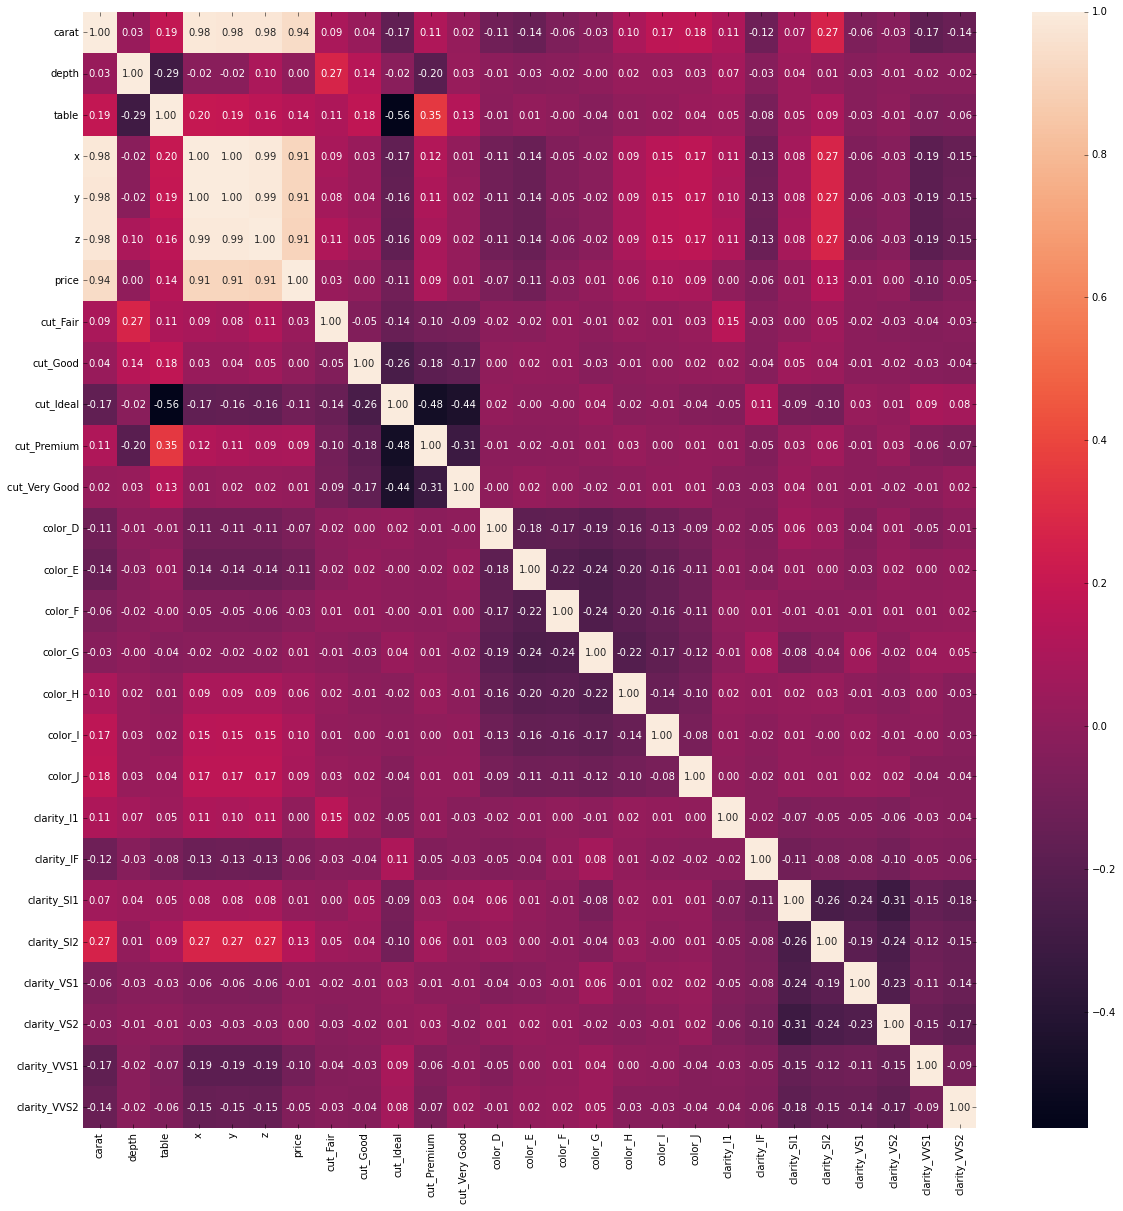

In [492]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

# Insight

There are correlation between the price and other variables. The price is correlated with the carat(weight of the cubic zircoinia) and the length(X) ,width(Y) and height(Z) of the cubic zirconia. If the value of these variable is high the price is also high and the profit share is also high.

# Pairplot

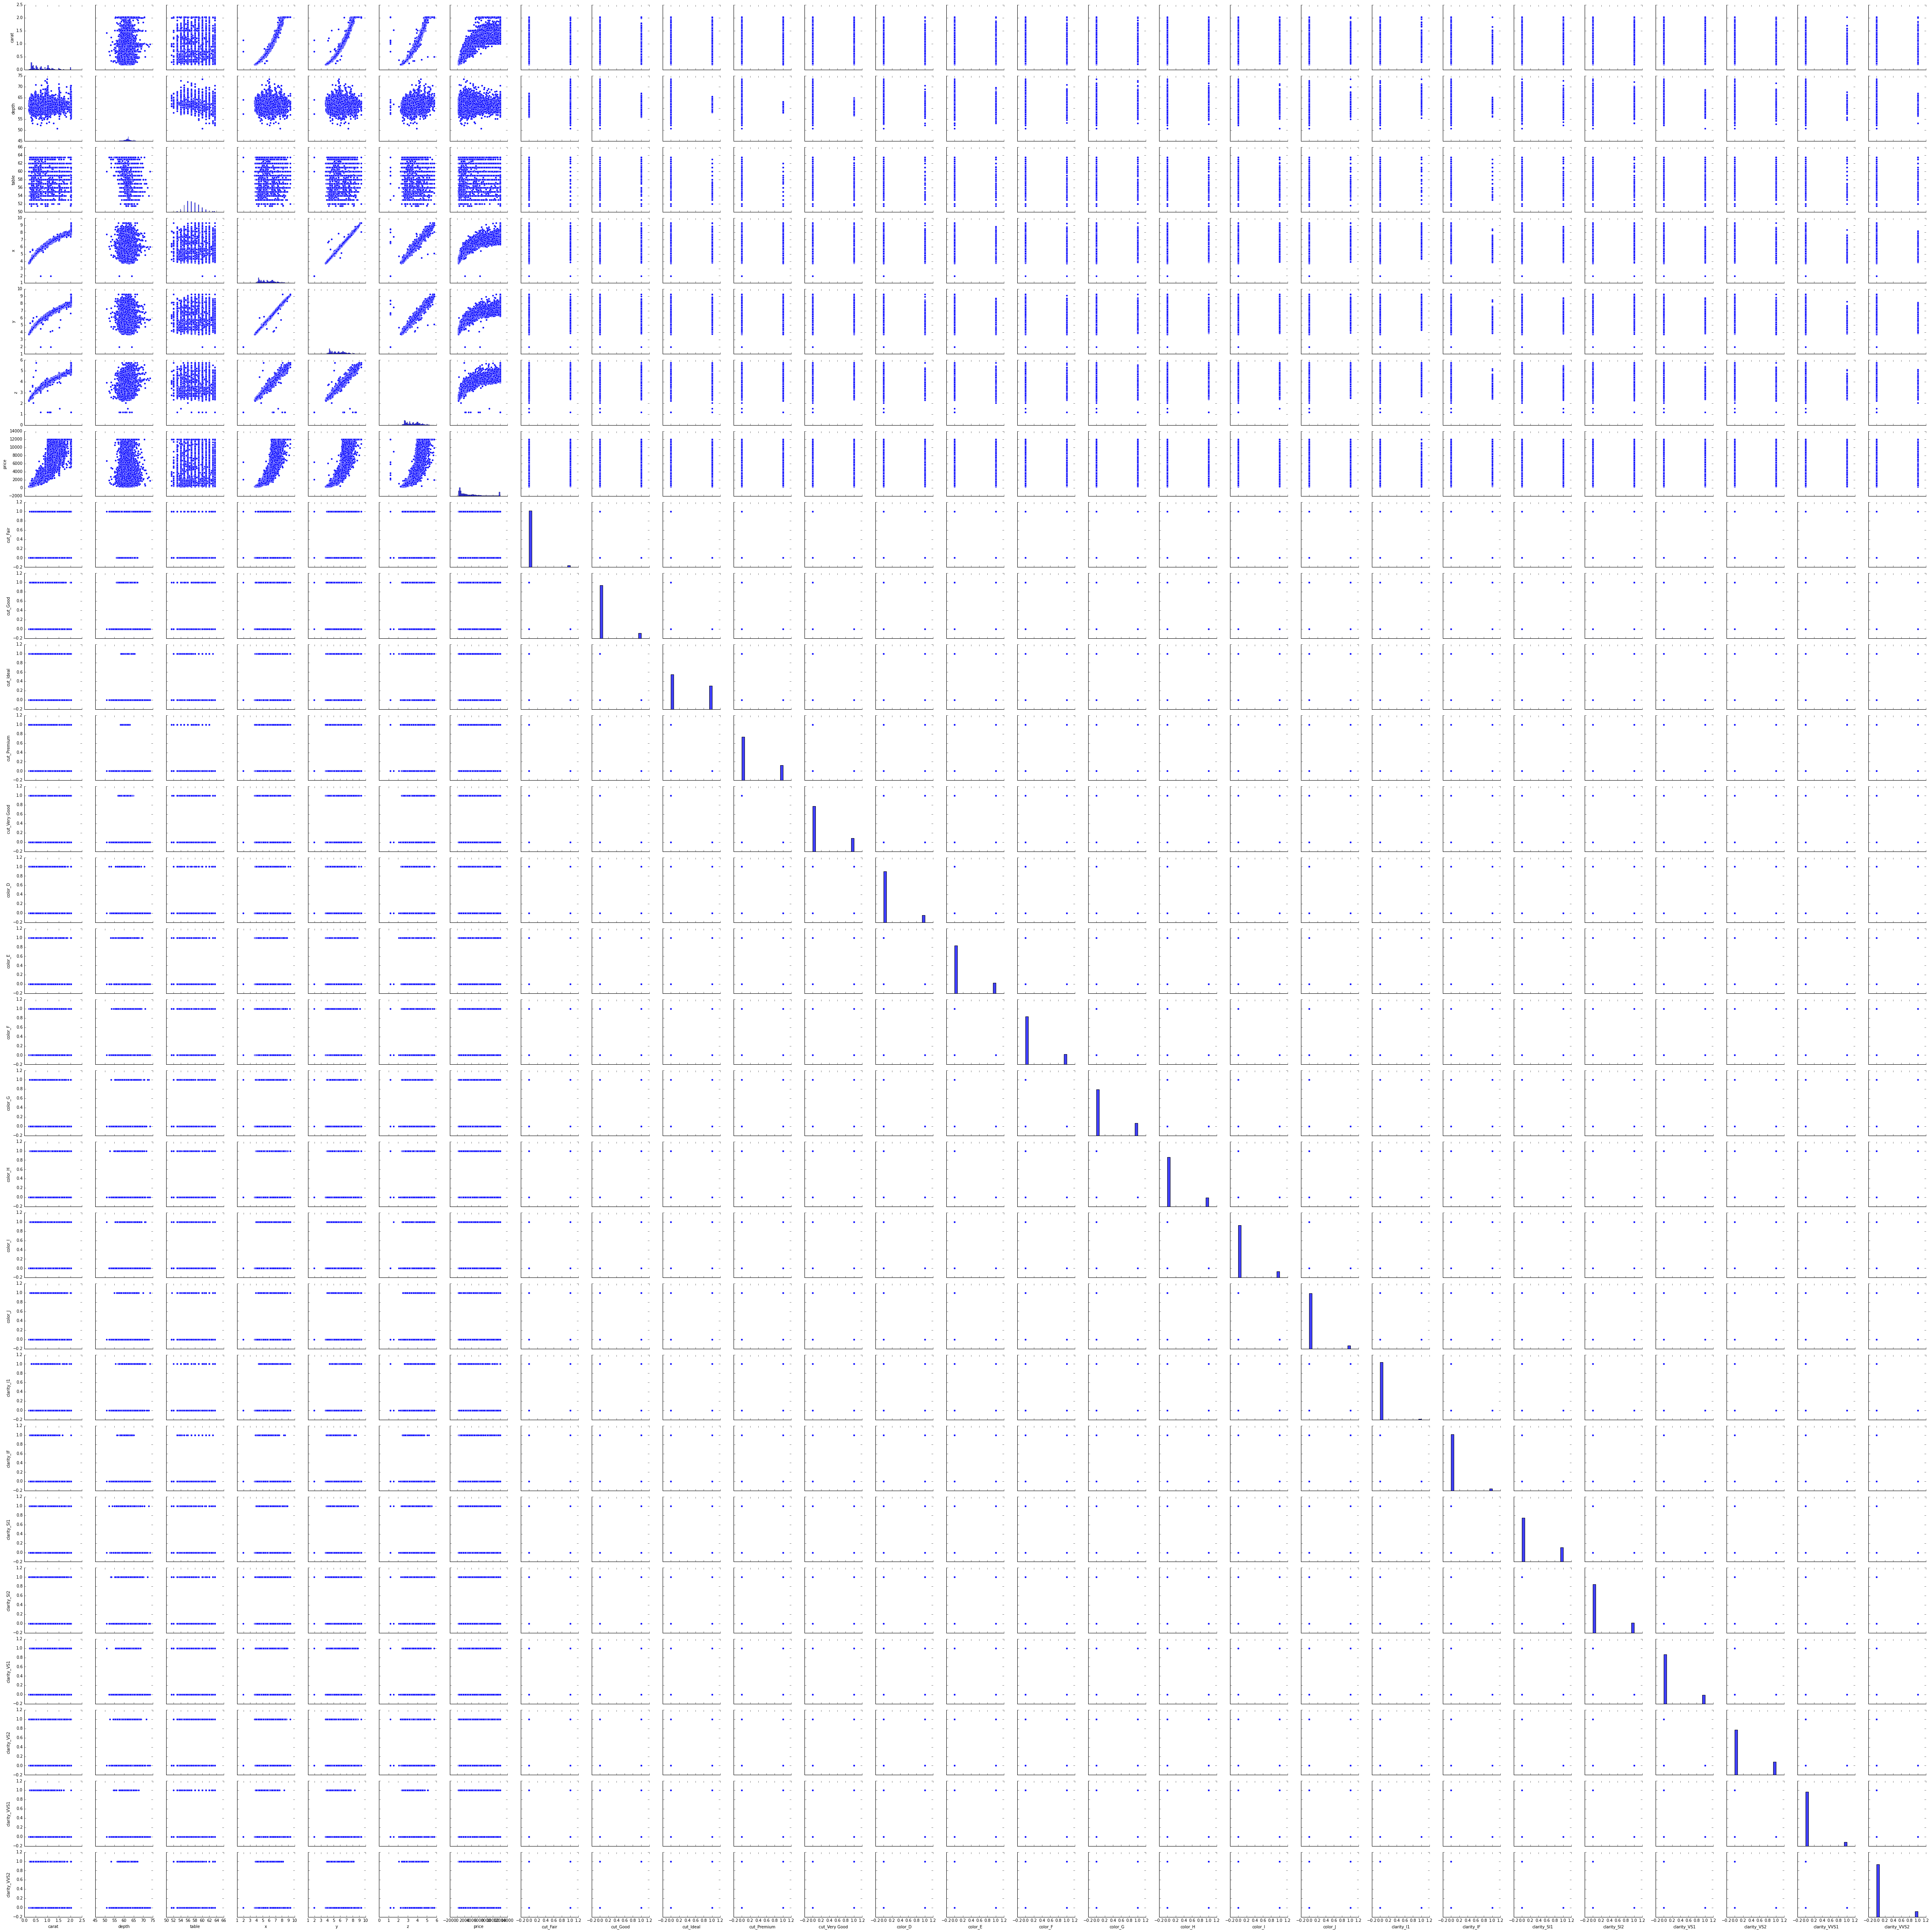

In [493]:
sns.pairplot(df)

# Insight

There are correlation between the price and other variables. The price is correlated with the carat(weight of the cubic zircoinia) and the length(X) ,width(Y) and height(Z) of the cubic zirconia. If the value of these variable is high the price is also high and the profit share is also high.

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [494]:
df.isnull().sum()

carat              0
depth            697
table              0
x                  0
y                  0
z                  0
price              0
cut_Fair           0
cut_Good           0
cut_Ideal          0
cut_Premium        0
cut_Very Good      0
color_D            0
color_E            0
color_F            0
color_G            0
color_H            0
color_I            0
color_J            0
clarity_I1         0
clarity_IF         0
clarity_SI1        0
clarity_SI2        0
clarity_VS1        0
clarity_VS2        0
clarity_VVS1       0
clarity_VVS2       0
dtype: int64

In [495]:
df = df.dropna()

In [496]:
df.isnull().sum()

carat            0
depth            0
table            0
x                0
y                0
z                0
price            0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64

# Insight

In the dataset there are only depth variable has the null values. It is very low approx 0.02% in the dataset so we can drop the null values.

The sub levels are diffrent of all Categorical variables. So it hard to combine them.But we combine the Good and Very Good of cut variable and create the new sub level of variable. 

# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [497]:
X = df.drop("price" , axis =1)

y = df["price"]

# Linear Regrssion model using Sklearn Model

In [498]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [499]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [500]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 9093.365114392305
The coefficient for depth is -16.803883978181943
The coefficient for table is -22.0296974635567
The coefficient for x is -1238.2611286614313
The coefficient for y is 879.924434682014
The coefficient for z is -155.75860195030614
The coefficient for cut_Fair is -438.3638992833562
The coefficient for cut_Good is -28.469050310502237
The coefficient for cut_Ideal is 196.9126085001743
The coefficient for cut_Premium is 177.71914201861512
The coefficient for cut_Very Good is 92.20119907507784
The coefficient for color_D is 701.5805059768908
The coefficient for color_E is 513.8090492145317
The coefficient for color_F is 446.06667858572564
The coefficient for color_G is 294.79977257977765
The coefficient for color_H is -152.60424937741408
The coefficient for color_I is -615.2975511303168
The coefficient for color_J is -1188.3542058491819
The coefficient for clarity_I1 is -2870.8309250306215
The coefficient for clarity_IF is 1213.3123588342276
The c

In [501]:
X_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [502]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1027.903751810008


In [503]:
regression_model.score(X_train, y_train)

0.941781686782262

In [504]:
regression_model.score(X_test, y_test)

0.9375559828407543

In [505]:
data_train = pd.concat([X_train, y_train], axis=1)

In [506]:
data_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
23846,0.35,60.1,62.0,4.52,4.57,2.73,0,0,0,0,...,0,0,0,0,0,0,0,1,0,745.0
6397,0.41,62.5,58.0,4.75,4.72,2.96,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1356.0
478,0.92,62.2,55.0,6.19,6.26,3.87,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4621.0
22277,0.71,58.4,62.1,5.80,5.83,3.40,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2282.0
21314,1.12,58.9,60.0,6.78,6.91,4.03,0,0,0,0,...,0,0,0,0,0,0,0,1,0,8072.0


# Insight

Cofficient of most variable is positive so we use them for the prediction.But some variables ha ve negative cofficient so they are not good pridictor.

# Linear Regrssion model using Stats Model Ols

In [507]:
X_con=sm.add_constant(X)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [508]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, y, test_size=0.30 , random_state=1)

In [509]:
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.290e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        15:18:33   Log-Likelihood:            -1.4974e+05
No. Observations:               18365   AIC:                         2.995e+05
Df Residuals:                   18341   BIC:                         2.997e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           700.2751    431.356      1.623      0.105    -145.224    1545.774
carat          9093.3651     76.112    119.473      0.000    8944.178    9242.552
depth           -16.8039      8.018     -2.096      0.036     -32.519      -1.088
table           -22.0297      3.898     -5.652      0.000     -29.670     -14.389
x             -1238.2611    115.200    -10.749      0.000   -1464.063   -1012.459
y               879.9244    115.917      7.591      0.000     652.717    1107.132
z              -155.7586     97.555     -1.597      0.110    -346.975      35.458
cut_Fair       -298.3089     98.747     -3.021      0.003    -491.863    -104.755
cut_Good        111.5860     90.706      1.230      0.219     -66.206     289.378
cut_Ideal       336.9676     81.261      4.147      0.000     177.689     496.246
cut_Premium     317.7742     85.331      3.724      0.000     150.517     485.031
cut_Very Good   232.2562     86.178      2.695      0.007      63.339     401.174
color_D         801.6198     63.691     12.586      0.000     676.780     926.460
color_E         613.8483     63.183      9.715      0.000     490.004     737.693
color_F         546.1060     63.108      8.653      0.000     422.408     669.804
color_G         394.8391     63.259      6.242      0.000     270.846     518.833
color_H         -52.5650     63.480     -0.828      0.408    -176.992      71.862
color_I        -515.2583     64.477     -7.991      0.000    -641.640    -388.877
color_J       -1088.3149     66.240    -16.430      0.000   -1218.151    -958.478
clarity_I1    -2783.2965     73.984    -37.620      0.000   -2928.312   -2638.281
clarity_IF     1300.8467     61.079     21.298      0.000    1181.125    1420.568
clarity_SI1    -131.5427     56.800     -2.316      0.021    -242.877     -20.209
clarity_SI2    -952.4910     56.953    -16.724      0.000   -1064.124    -840.858
clarity_VS1     673.5443     56.273     11.969      0.000     563.244     783.844
clarity_VS2     396.2385     56.118      7.061      0.000     286.243     506.234
clarity_VVS1   1108.2564     57.646     19.225      0.000     995.266    1221.247
clarity_VVS2   1088.7193     56.968     19.111      0.000     977.056    1200.383
==============================================================================
Omnibus:                     4362.247   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15969.430
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       6.935   Cond. No.                     9.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-26. This mig

In [510]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 94.1782 %


In [511]:
ypred = model.predict(X_testc)
print(ypred)

11506       77.780516
18184     1391.110418
20533     3963.175062
14263     1203.915568
16605     5993.525792
             ...     
9735      4476.503934
16678     2229.747481
7147       -95.700770
4803      5862.276073
20510    12294.335543
Length: 7871, dtype: float64


# Insight

In the ols method the accuracy is 94%.But some variables have p_value which is greter then default p_value. So we reject them for prediction. The probability(p_value) of JB test is 0 which is less then .05 so the data is not normally distributed. And the p_value of Omnibus is also 0 so the assumptions of linear regression is not Satisfied. The variation in the independent variable which is explained by the dependent variable is 94.1782 %. 

#  train set RMSE Score

In [512]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model.fittedvalues,y_trainc,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 841.0660571618472


In [513]:
math.sqrt(np.mean((model.predict(X_trainc)-y_trainc)**2))

841.0660571618482

In [514]:
model.predict(X_trainc)

23846     794.239257
6397     2119.160327
478      4696.860280
22277    2153.117212
21314    7365.825317
            ...     
11264    6384.452202
17770    2616.960032
5332     1393.462838
12520    3325.752370
241      6056.719634
Length: 18365, dtype: float64

# test set RMSE Score 

In [515]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 854.0146033796848


# Insight 

The root mean square error of train and test is 841.066 , 854.0146.

# Linear Regrssion model using VIF

In [516]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [517]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [518]:
i=0
for column in X.columns:
    if i < 24:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.31940341616809
depth ---> 3.403509753169026
table ---> 1.8169516442769742
x ---> 444.79272915506664
y ---> 437.93072412457803
z ---> 126.61659433662834
cut_Fair ---> inf
cut_Good ---> inf
cut_Ideal ---> inf
cut_Premium ---> inf
cut_Very Good ---> inf
color_D ---> inf
color_E ---> inf
color_F ---> inf
color_G ---> inf
color_H ---> inf
color_I ---> inf
color_J ---> inf
clarity_I1 ---> inf
clarity_IF ---> inf
clarity_SI1 ---> inf
clarity_SI2 ---> inf
clarity_VS1 ---> inf
clarity_VS2 ---> inf


# Insight

The variation inflation factor of all the variabls.

# Mean Square Error

In [519]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [520]:
math.sqrt(mse)

854.0146033796813

In [521]:
regression_model.score(X_test, y_test)

0.9375559828407543

In [522]:
y_pred = regression_model.predict(X_test)

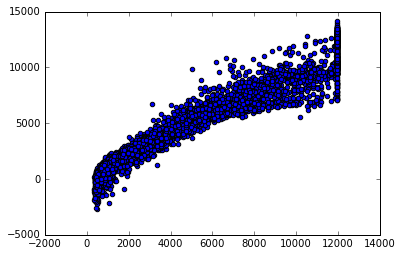

In [524]:
plt.scatter(y_test, y_pred)

# Insight

The accuracy is approx 94%. It is positively increase so y_pred is good prictor of the y_obser.  

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Basis of pridiction the price of cubic zirconia is highly correlated to the height,width and length and the carat weight. So we should try to focus on these factors. If the value of these variable will high then the price is also high.

For making the cubic zirconia the cutting should be proper.

We should try make the more SI1,SI2,l1 type of cubic zirconia. Because these are better qualities of the cubic zirconia. 

# Problem 2: Logistic Regression and LDA

# You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [2]:
df = pd.read_csv("Holiday_Package.csv")

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


# Observation
Top 5 record of the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


# Observation


In the dataset there are 8 columns in which 6 integer and 2 object type variable and there are 872 rows in the dataset.

In [5]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

# Observation

In the dataset there are not a single null value is present in the dataset.

In [6]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


# Observation

In the dataset there are 872 rows and 6 numeric columns out of 8 total columns. In the dataset most of the variables have approxly mean and median are same and also there are some variables have outliers.

In [7]:
df.shape

(872, 8)

# Observation

In the dataset there are 8 columns and there are 872 rows in the dataset.

In [8]:
df.duplicated().sum()

0

# Observation

The datset has zero duplicate values.

In [9]:
df = df.drop("Unnamed: 0" , axis =1)

In [10]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [11]:
df['foreign'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [13]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [14]:
df['Holliday_Package'] = LE.fit_transform(df['Holliday_Package'])

In [15]:
df = pd.get_dummies(df,columns=['foreign'],drop_first=True)

# EDA

# Univariate  Analysis

In [16]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign_yes'],
      dtype='object')

In [17]:
df.describe()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,0.459862,47729.172018,39.955275,9.307339,0.311927,0.982798,0.247706
std,0.498672,23418.668531,10.551675,3.036259,0.612870,1.086786,0.431928
min,0.000000,1322.000000,20.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,35324.000000,32.000000,8.000000,0.000000,0.000000,0.000000
50%,0.000000,41903.500000,39.000000,9.000000,0.000000,1.000000,0.000000
75%,1.000000,53469.500000,48.000000,12.000000,0.000000,2.000000,0.000000
max,1.000000,236961.000000,62.000000,21.000000,3.000000,6.000000,1.000000


# Distplot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

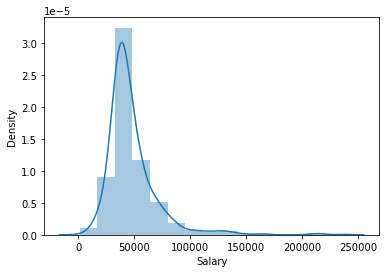

In [18]:
sns.distplot(df.Salary,bins =15)

# Insight

The data is not perfectly normally distributed.It is Right skewed data disrtibution.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

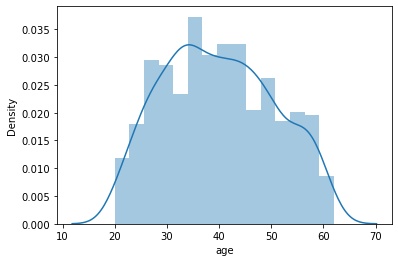

In [19]:
sns.distplot(df.age,bins =15)

# Insight

Data is almost normally disributed.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educ', ylabel='Density'>

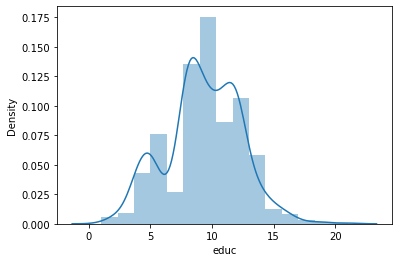

In [20]:
sns.distplot(df.educ,bins =15)

# Insight

Data is not normally distributed.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_young_children', ylabel='Density'>

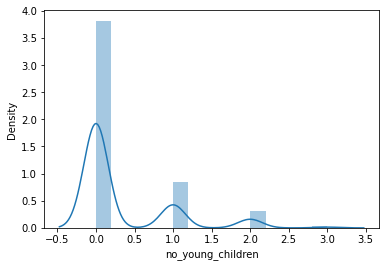

In [21]:
sns.distplot(df.no_young_children,bins =15)

# Insight

It is Right skewed data distribution.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_older_children', ylabel='Density'>

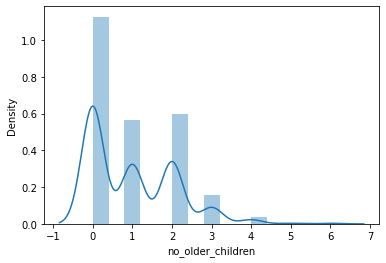

In [22]:
sns.distplot(df.no_older_children,bins =15)

# Insight

It is Right skewed data distribution.

# Bivariate Analysis

# Heatmap

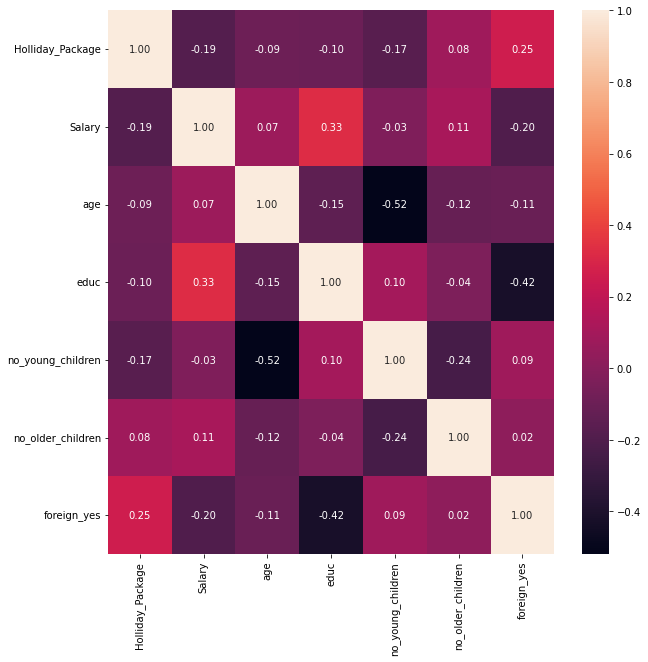

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

# Insight

In the dataset there are noone strongly corelated variables present in the dataset.

# Pairplot

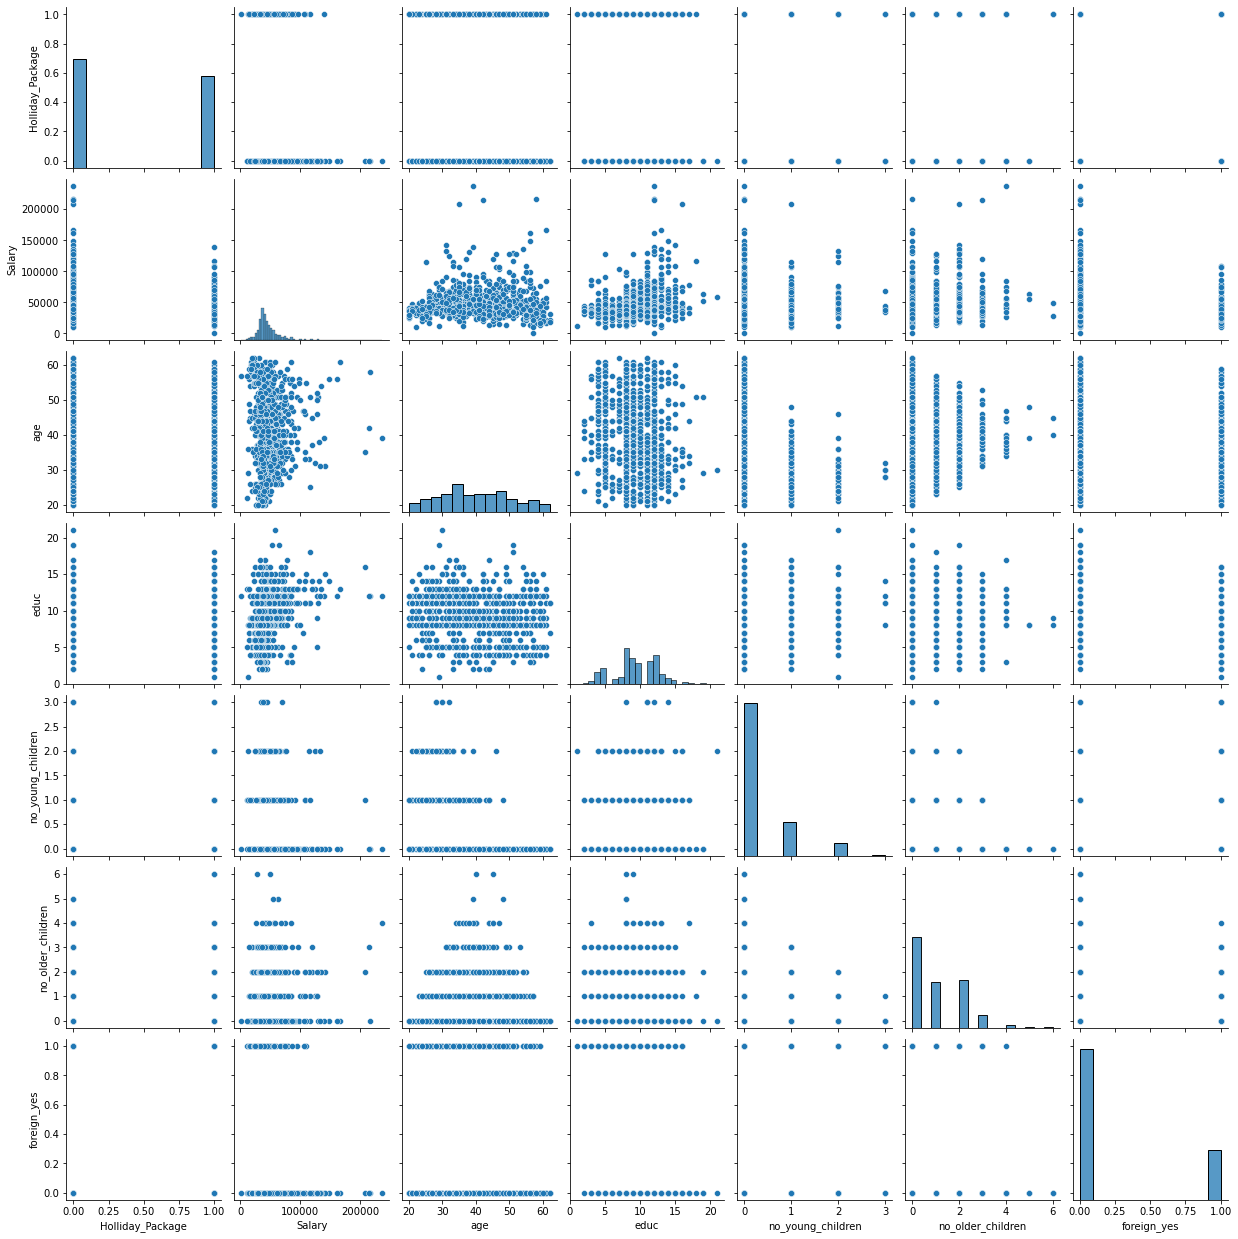

In [24]:
sns.pairplot(df)

# Insight

In the data set there are no any Positive or Negetive correlation between two variable.They all are constant.

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [25]:
X = df.drop("Holliday_Package" , axis =1)

y = df["Holliday_Package"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Logistic Regression

In [27]:
model = LogisticRegression(solver='liblinear',max_iter=10000,verbose=True,n_jobs=2)
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


[LibLinear]

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', verbose=True)

In [28]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [29]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.628719,0.371281
1,0.518204,0.481796
2,0.559508,0.440492
3,0.730830,0.269170
4,0.502850,0.497150


# LDA

In [62]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [63]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

# Insight

Split the the data into train and test set. Split the dependent variable into X and Y. Then creat the Logistic Regression model by using liblinear solver and find the probability of 0 and 1 and then make the LDA model by using the clf function. 

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

# Logistic Regression

In [32]:
model.score(X_train, y_train)

0.6721311475409836

AUC: 0.742


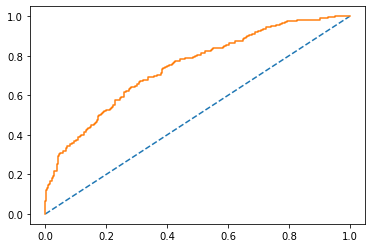

In [33]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [34]:
model.score(X_test, y_test)

0.6412213740458015

AUC: 0.742


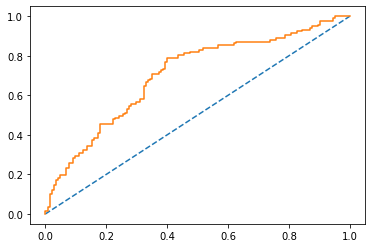

In [35]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [36]:
confusion_matrix(y_train, ytrain_predict)

array([[294,  32],
       [260,  24]], dtype=int64)

In [37]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.53      0.90      0.67       326
           1       0.43      0.08      0.14       284

    accuracy                           0.52       610
   macro avg       0.48      0.49      0.40       610
weighted avg       0.48      0.52      0.42       610



In [38]:
confusion_matrix(y_test, ytest_predict)

array([[129,  16],
       [105,  12]], dtype=int64)

In [39]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.55      0.89      0.68       145
           1       0.43      0.10      0.17       117

    accuracy                           0.54       262
   macro avg       0.49      0.50      0.42       262
weighted avg       0.50      0.54      0.45       262



# Applying GridSearchCV for Logistic Regression

In [40]:
grid={'penalty':['l2','none'],
      'solver':['sag','liblinear'],
      'tol':[0.0001,0.00001]}

In [41]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [42]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [43]:
grid_search.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.         0.         0.11997126 0.59514329 0.         0.
        nan        nan]
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [44]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', tol=1e-05)


In [45]:
best_model = grid_search.best_estimator_

In [46]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [47]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.752572,0.247428
1,0.289966,0.710034
2,0.894620,0.105380
3,0.968419,0.031581
4,0.475759,0.524241


In [48]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 



In [49]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       145
           1       0.61      0.56      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262
 



# LDA

In [64]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

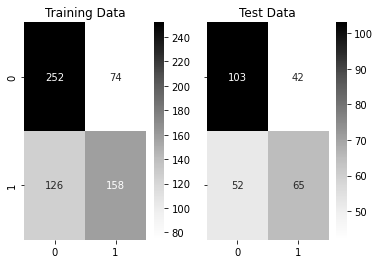

In [52]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [53]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [65]:
pred_prob_train = model.predict_proba(X_train)
pred_prob_test = model.predict_proba(X_test)

In [66]:
pred_prob_train[:,1]

array([0.24451841, 0.74473838, 0.02926233, 0.33696244, 0.53643674,
       0.77166141, 0.42537442, 0.29503123, 0.22447685, 0.30070348,
       0.28534521, 0.25472358, 0.36253223, 0.49555106, 0.43238182,
       0.76289172, 0.76180657, 0.13440254, 0.43765202, 0.8874783 ,
       0.70795813, 0.17152298, 0.21548115, 0.63053721, 0.2367007 ,
       0.32348888, 0.64312884, 0.32722211, 0.85239686, 0.28937042,
       0.70512591, 0.80009771, 0.52040802, 0.27686374, 0.3164615 ,
       0.54760845, 0.52040327, 0.31517416, 0.44152214, 0.06906226,
       0.34406846, 0.54935353, 0.29231453, 0.88221405, 0.07678677,
       0.76222865, 0.68956941, 0.1184114 , 0.06581715, 0.55511382,
       0.47496466, 0.24377183, 0.66339382, 0.45779134, 0.89305876,
       0.44876138, 0.65167779, 0.2604166 , 0.68041423, 0.33655869,
       0.3568944 , 0.25495093, 0.18266474, 0.11733085, 0.30783826,
       0.36037879, 0.54026683, 0.58991236, 0.06395937, 0.59328948,
       0.63404283, 0.23717375, 0.38986934, 0.78549853, 0.37122

AUC for the Training Data: 0.742


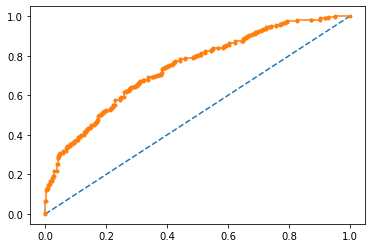

In [67]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

AUC for the Test Data: 0.703


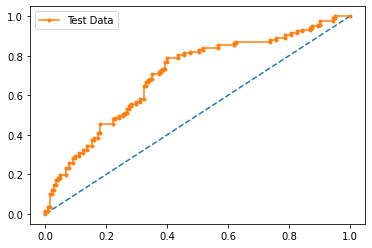

In [68]:
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.4918
F1 Score 0.6461 

Confusion Matrix


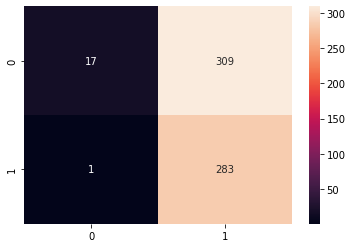

0.2 

Accuracy Score 0.5361
F1 Score 0.6627 

Confusion Matrix


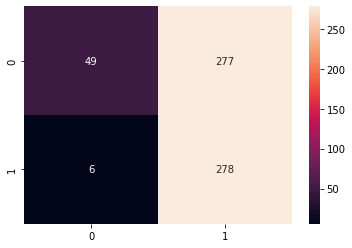

0.3 

Accuracy Score 0.5984
F1 Score 0.6738 

Confusion Matrix


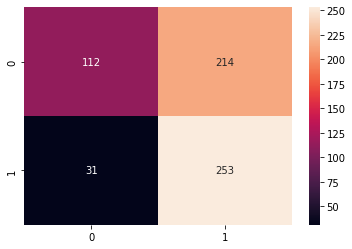

0.4 

Accuracy Score 0.6672
F1 Score 0.6762 

Confusion Matrix


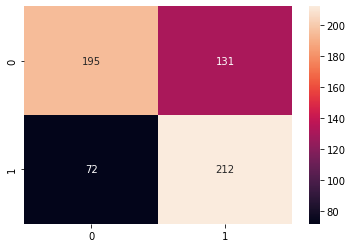

0.5 

Accuracy Score 0.6721
F1 Score 0.6124 

Confusion Matrix


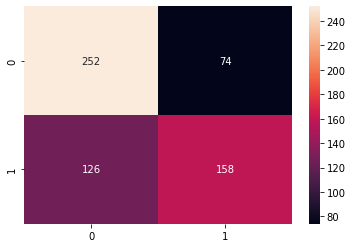

0.6 

Accuracy Score 0.659
F1 Score 0.5357 

Confusion Matrix


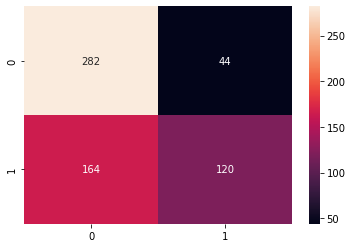

0.7 

Accuracy Score 0.6475
F1 Score 0.4557 

Confusion Matrix


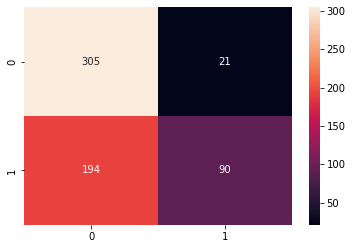

0.8 

Accuracy Score 0.6
F1 Score 0.2695 

Confusion Matrix


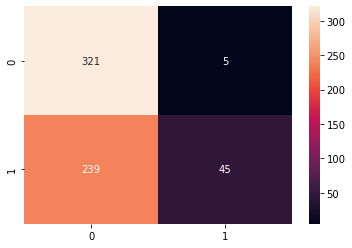

0.9 

Accuracy Score 0.5426
F1 Score 0.0346 

Confusion Matrix


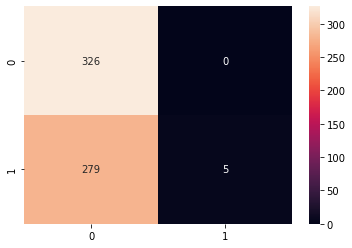

In [69]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [70]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

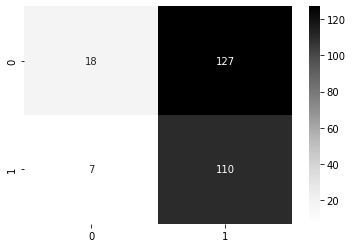

In [71]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [72]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.12      0.21       145
           1       0.46      0.94      0.62       117

    accuracy                           0.49       262
   macro avg       0.59      0.53      0.42       262
weighted avg       0.61      0.49      0.39       262
 



# Insight

Accuracy of Logistic Regression is 52%(Train) and 54%(test).But after apply gridsearch cv the accuracy was increase and in LDA the accuracy of train and test 67% and 64% . The AUC of Train and test is 74% in Logistic Regression and the AUC of train and test is 74% and 70% in LDA. Recall is very poor of Logistic regression before apply Gridsearch Cv after that the recall was increase and in LDA the Recall was good but after change the cut off the recall was increase. 

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Basis of prediction and after analysis the insights the LDA is good for model building as compair to Logistic Regression.After apply the GridSearch Cv the recall is increase and it become 56%  but in LDA when we change the cut-off the test recall change and it become 94%. By using LDA we know that 94% employee don't take Holiday Package. So we try to conviense them for buying the Holiday Package.